In [1]:
#importing anticipated modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import datetime
import collections
import statsmodels.stats.proportion
%matplotlib inline

In [2]:
# Set the default plot aesthetics to be more presentable.
sns.set_style("white")

In [3]:
#importng the target csv files
inspect_df = pd.read_csv('/Users/manueltanguma/Downloads/inspections.csv', encoding='latin-1')
violate_df = pd.read_csv('/Users/manueltanguma/Downloads/violations.csv', encoding='latin-1')

## Context
### Restaurants and markets in Los Angeles county are regularly inspected for health code violations. The county makes these data publicly available and accessible, enabling a transparent look into this public health information.

### Content
### The data covers health code inspections (inspections.csv) and health code violations (violation.csv). More details about the two files is provided in the sections below.

### Violations

### This dataset contains Environmental Health Violations for Restaurants and Markets in Los Angeles County. Los Angeles County Environmental Health is responsible for checking food violations for all unincorporated areas and 85 of the 88 cities in the County. This dataset does not include Pasadena, Long Beach or Vernon (each has its own city health department). Each row represents one health code violation.

### All rows with the same Activity Date, Record ID, and Serial Number are part of the same violation.

### The Serial Number is the primary key to review the inspection grade (Inspection Result dataset).

### Inspections

### This dataset contains Environmental Health Inspection Results for Restaurants and Markets in Los Angeles County. Los Angeles County Environmental Health is responsible for inspections and enforcement activities for all unincorporated areas and 85 of the 88 cities in the County. This dataset does not include Pasadena, Long Beach or Vernon (each has its own city health department). Each row represents one inspection result.

### The Activity Date, Record ID, and Serial Number are the primary keys to review the violations (Violations Dataset)



In [4]:
#Viewing the inspections dataset head
inspect_df.head(5)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [5]:
#viewing the violations dataset head
violate_df.head(5)

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [6]:
# printing the shape, and then looking at the info and descriptions of the individual datasets
print(inspect_df.shape)
print(violate_df.shape)

(191371, 20)
(906014, 5)


In [7]:
inspect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191371 entries, 0 to 191370
Data columns (total 20 columns):
activity_date          191371 non-null object
employee_id            191371 non-null object
facility_address       191371 non-null object
facility_city          191371 non-null object
facility_id            191371 non-null object
facility_name          191371 non-null object
facility_state         191371 non-null object
facility_zip           191371 non-null object
grade                  191371 non-null object
owner_id               191371 non-null object
owner_name             191371 non-null object
pe_description         191371 non-null object
program_element_pe     191371 non-null int64
program_name           190969 non-null object
program_status         191371 non-null object
record_id              191371 non-null object
score                  191371 non-null int64
serial_number          191371 non-null object
service_code           191371 non-null int64
service_descriptio

In [8]:
violate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906014 entries, 0 to 906013
Data columns (total 5 columns):
points                   906014 non-null int64
serial_number            906014 non-null object
violation_code           906014 non-null object
violation_description    906014 non-null object
violation_status         906014 non-null object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [9]:
inspect_df.describe()

,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


In [10]:
violate_df.describe()

,points
count,906014.000000
mean,1.331127
std,0.807775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


In [11]:
#looking for empty data fields
inspect_df.isnull().sum()

activity_date            0
employee_id              0
facility_address         0
facility_city            0
facility_id              0
facility_name            0
facility_state           0
facility_zip             0
grade                    0
owner_id                 0
owner_name               0
pe_description           0
program_element_pe       0
program_name           402
program_status           0
record_id                0
score                    0
serial_number            0
service_code             0
service_description      0
dtype: int64

In [12]:
#looking for empty data fields
violate_df.isnull().sum()

points                   0
serial_number            0
violation_code           0
violation_description    0
violation_status         0
dtype: int64

In [13]:
# the inspections dataset seems to have some empty fields
print (inspect_df.isnull().any(axis=1))

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
191341    False
191342    False
191343    False
191344    False
191345    False
191346    False
191347    False
191348    False
191349    False
191350    False
191351    False
191352    False
191353    False
191354    False
191355    False
191356    False
191357    False
191358    False
191359    False
191360    False
191361    False
191362    False
191363    False
191364    False
191365    False
191366    False
191367    False
191368    False
191369    False
191370    False
Length: 191371, dtype: b

In [14]:
#from this step learned that using facility_name is better than program_name for identifying food establishment
checkinspect_df = inspect_df[inspect_df.isnull().any(axis=1)]
print (checkinspect_df)

       activity_date employee_id                     facility_address  \
75        2016-01-27   EE0000476                     757 S WORKMAN ST   
841       2017-04-13   EE0000730                  20223 S AVALON BLVD   
1418      2016-10-31   EE0000025             7201 1/2 LANKERSHIM BLVD   
1419      2017-09-25   EE0000905  3650 W MARTIN LUTHER KING BLVD #140   
2049      2016-02-01   EE0000997             3476 WHITTIER BLVD 101-2   
2134      2017-10-18   EE0000215                3500 W OLIVE AVE #105   
2464      2016-04-25   EE0000744                  7200 FIRESTONE BLVD   
2690      2016-11-17   EE0000997                      943 SUN MUN WAY   
2706      2017-07-25   EE0000523                801 S GLENDALE AVE #3   
3251      2017-02-22   EE0000011                  15535 DEVONSHIRE ST   
3750      2017-12-19   EE0000721                      702 S SPRING ST   
4668      2015-08-24   EE0000018                 1050 W ROSECRANS AVE   
4800      2017-07-20   EE0000682                   

In [15]:
#replacing empty fields in program name column with facility name since both are the same
inspect_df['program_name'].fillna((inspect_df['program_name'] == inspect_df['facility_name']), inplace=True)

In [16]:
#looking for empty data fields again after filling in empty program_name fields in the inspections dataset
inspect_df.isnull().sum()

activity_date          0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_name          0
facility_state         0
facility_zip           0
grade                  0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           0
program_status         0
record_id              0
score                  0
serial_number          0
service_code           0
service_description    0
dtype: int64

In [17]:
#changing and simplfying the dataframe name
X = inspect_df

In [18]:
# Seeing which categorical variables to simplify; looking for columns with not too many unique categories
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print ("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, 
                                                                                unique_cat=unique_cat))

Feature 'activity_date' has 742 unique categories
Feature 'employee_id' has 250 unique categories
Feature 'facility_address' has 39283 unique categories
Feature 'facility_city' has 181 unique categories
Feature 'facility_id' has 44031 unique categories
Feature 'facility_name' has 36627 unique categories
Feature 'facility_state' has 3 unique categories
Feature 'facility_zip' has 3037 unique categories
Feature 'grade' has 4 unique categories
Feature 'owner_id' has 35713 unique categories
Feature 'owner_name' has 34708 unique categories
Feature 'pe_description' has 18 unique categories
Feature 'program_name' has 38989 unique categories
Feature 'program_status' has 2 unique categories
Feature 'record_id' has 47445 unique categories
Feature 'serial_number' has 191371 unique categories
Feature 'service_description' has 2 unique categories


In [19]:
X['program_status'].value_counts()

ACTIVE      169477
INACTIVE     21894
Name: program_status, dtype: int64

In [20]:
X['service_code'].value_counts()

1      188463
401      2908
Name: service_code, dtype: int64

In [21]:
X['service_description'].value_counts()

ROUTINE INSPECTION                  188463
OWNER INITIATED ROUTINE INSPECT.      2908
Name: service_description, dtype: int64

In [22]:
X['score'].value_counts().sort_values(ascending=False)

90     24563
96     20771
95     20321
97     19369
94     19264
93     17480
92     15811
98     15610
91     14667
99      8925
100     4497
80      1349
85      1313
84      1199
86      1162
83      1113
87       934
82       930
81       805
88       468
75       106
89       106
77        96
76        94
74        69
72        66
78        66
70        61
73        57
71        36
79        31
67         5
65         4
64         4
66         3
68         3
69         3
62         2
59         2
58         1
57         1
55         1
60         1
63         1
54         1
Name: score, dtype: int64

In [23]:
X['pe_description'].value_counts().sort_values(ascending=False)

RESTAURANT (0-30) SEATS HIGH RISK              38881
RESTAURANT (31-60) SEATS HIGH RISK             31382
RESTAURANT (0-30) SEATS MODERATE RISK          30157
RESTAURANT (61-150) SEATS HIGH RISK            25166
FOOD MKT RETAIL (25-1,999 SF) LOW RISK         15872
RESTAURANT (151 + ) SEATS HIGH RISK            10528
FOOD MKT RETAIL (25-1,999 SF) HIGH RISK         8920
RESTAURANT (31-60) SEATS MODERATE RISK          6089
FOOD MKT RETAIL (2,000+ SF) LOW RISK            6068
RESTAURANT (0-30) SEATS LOW RISK                4938
RESTAURANT (61-150) SEATS MODERATE RISK         4507
FOOD MKT RETAIL (2,000+ SF) HIGH RISK           2929
FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK     1863
RESTAURANT (31-60) SEATS LOW RISK               1497
FOOD MKT RETAIL (2,000+ SF) MODERATE RISK       1006
RESTAURANT (151 + ) SEATS MODERATE RISK          719
RESTAURANT (61-150) SEATS LOW RISK               618
RESTAURANT (151 + ) SEATS LOW RISK               231
Name: pe_description, dtype: int64

In [24]:
JIBBER = ('RESTAURANT (0-30) SEATS HIGH RISK', 'RESTAURANT (31-60) SEATS HIGH RISK', 'RESTAURANT (0-30) SEATS MODERATE RISK',
         'RESTAURANT (61-150) SEATS HIGH RISK', 'RESTAURANT (151 + ) SEATS HIGH RISK', 'RESTAURANT (31-60) SEATS MODERATE RISK',
         'RESTAURANT (0-30) SEATS LOW RISK', 'RESTAURANT (61-150) SEATS MODERATE RISK', 'RESTAURANT (31-60) SEATS LOW RISK',
         'RESTAURANT (151 + ) SEATS MODERATE RISK', 'RESTAURANT (61-150) SEATS LOW RISK', 'RESTAURANT (151 + ) SEATS LOW RISK')
JABBER = ('FOOD MKT RETAIL (25-1,999 SF) LOW RISK', 'FOOD MKT RETAIL (25-1,999 SF) HIGH RISK', 'FOOD MKT RETAIL (2,000+ SF) LOW RISK',
         'FOOD MKT RETAIL (2,000+ SF) HIGH RISK', 'FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK', 'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK')

X['pe_description'] = ['RESTAURANT' if x in JIBBER else 'FOOD MKT RETAIL' for x in X['pe_description']]

In [25]:
X['pe_description'].value_counts().sort_values(ascending = False )

RESTAURANT         154713
FOOD MKT RETAIL     36658
Name: pe_description, dtype: int64

In [26]:
X['facility_city'].value_counts().sort_values(ascending=False)

LOS ANGELES          53669
GLENDALE              4405
TORRANCE              4130
BURBANK               3626
SANTA MONICA          3601
NORTH HOLLYWOOD       3281
VAN NUYS              3083
WHITTIER              2751
POMONA                2655
LANCASTER             2371
INGLEWOOD             2337
GARDENA               2295
DOWNEY                2214
WEST COVINA           2150
PALMDALE              2100
NORTHRIDGE            2088
CULVER CITY           1876
EL MONTE              1856
WOODLAND HILLS        1825
ARCADIA               1777
SHERMAN OAKS          1776
REDONDO BEACH         1734
WEST HOLLYWOOD        1690
SAN GABRIEL           1663
CARSON                1604
NORWALK               1599
BEVERLY HILLS         1598
ROWLAND HEIGHTS       1589
LAKEWOOD              1572
CANOGA PARK           1556
                     ...  
AGOURA                   8
TERMINAL ISLAND          8
AGUA DULCE               8
EL SERENO                8
SEPULVEDA                7
CENTURY CITY             7
L

In [27]:
#Simplifying the 'facility city' column into 2 main variables.  Either in the city or not in the city.
X['facility_city'] = ['LOS ANGELES' if x == 'LOS ANGELES' else 'SURROUNDING LA AREA' for x in X['facility_city']]

In [28]:
# Seeing which categorical variables to attempt to simplify again
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print ("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, 
                                                                                unique_cat=unique_cat))

Feature 'activity_date' has 742 unique categories
Feature 'employee_id' has 250 unique categories
Feature 'facility_address' has 39283 unique categories
Feature 'facility_city' has 2 unique categories
Feature 'facility_id' has 44031 unique categories
Feature 'facility_name' has 36627 unique categories
Feature 'facility_state' has 3 unique categories
Feature 'facility_zip' has 3037 unique categories
Feature 'grade' has 4 unique categories
Feature 'owner_id' has 35713 unique categories
Feature 'owner_name' has 34708 unique categories
Feature 'pe_description' has 2 unique categories
Feature 'program_name' has 38989 unique categories
Feature 'program_status' has 2 unique categories
Feature 'record_id' has 47445 unique categories
Feature 'serial_number' has 191371 unique categories
Feature 'service_description' has 2 unique categories


In [29]:
#printing out the head of the X database (the inspections database)
X.head(5)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,SURROUNDING LA AREA,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,FOOD MKT RETAIL,1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,SURROUNDING LA AREA,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,SURROUNDING LA AREA,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,FOOD MKT RETAIL,1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,SURROUNDING LA AREA,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,SURROUNDING LA AREA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [30]:
#dropping what I consider non-necessary columns in the dataframe; note that facility state is unnecessary since it is 
#all in California, and changing the name of the database into 'target'
target_df = X.drop(columns=['employee_id', 'facility_id', 'owner_id', 'program_name', 'service_code', 'facility_state'])
target_df.head(5)

,activity_date,facility_address,facility_city,facility_name,facility_zip,grade,owner_name,pe_description,program_element_pe,program_status,record_id,score,serial_number,service_description
0,2017-05-09,17660 CHATSWORTH ST,SURROUNDING LA AREA,HOVIK'S FAMOUS MEAT & DELI,91344,A,JOHN'S FAMOUS MEAT & DELI INC.,FOOD MKT RETAIL,1612,ACTIVE,PR0168541,98,DAHDRUQZO,ROUTINE INSPECTION
1,2017-04-10,3615 PACIFIC COAST HWY,SURROUNDING LA AREA,SHAKEY'S PIZZA,90505,A,"SCO, LLC",RESTAURANT,1638,ACTIVE,PR0190290,94,DAL3SBUE0,ROUTINE INSPECTION
2,2017-04-04,17515 CHATSWORTH ST,SURROUNDING LA AREA,BAITH AL HALAL,91344,A,SABIR MOHAMMAD SHAHID,FOOD MKT RETAIL,1612,INACTIVE,PR0036723,95,DAL2PIKJU,ROUTINE INSPECTION
3,2017-08-15,44455 VALLEY CENTRAL WAY,SURROUNDING LA AREA,FOOD 4 LESS #306,93536,A,"FOOD 4 LESS, INC.",RESTAURANT,1632,ACTIVE,PR0039905,98,DA0ZMAJXZ,ROUTINE INSPECTION
4,2016-09-26,11700 SOUTH ST,SURROUNDING LA AREA,PHO LITTLE SAIGON,90701,A,PHO SOUTH ST INC,RESTAURANT,1638,ACTIVE,PR0173311,96,DA41DBXA2,ROUTINE INSPECTION


In [31]:
target_df.tail(5)

,activity_date,facility_address,facility_city,facility_name,facility_zip,grade,owner_name,pe_description,program_element_pe,program_status,record_id,score,serial_number,service_description
191366,2016-05-10,3461 W 3RD ST,LOS ANGELES,VONS MARKET,90005,A,THE VONS COMPANIES INC.,RESTAURANT,1630,ACTIVE,PR0021549,98,DAQW0V2BJ,ROUTINE INSPECTION
191367,2016-08-17,15420 S WESTERN AVE STE A,SURROUNDING LA AREA,MOANA GRILL,90249,A,"MUHAN GLOBAL, INC",RESTAURANT,1632,ACTIVE,PR0167828,92,DAV0HVX0C,ROUTINE INSPECTION
191368,2016-06-30,11976 ARTESIA BLVD,SURROUNDING LA AREA,QUEST CAFE,90701,A,"KAN, ANDY",RESTAURANT,1635,INACTIVE,PR0042814,90,DATL8XDYB,ROUTINE INSPECTION
191369,2016-12-06,1430 W 25TH ST,SURROUNDING LA AREA,PINA'S MEXICAN RESTAURANT,90731,A,"MAGANA, HORTA AND MARTIN",RESTAURANT,1635,ACTIVE,PR0042806,92,DA3FOEGAF,ROUTINE INSPECTION
191370,2017-03-20,1654 W ADAMS BLVD,LOS ANGELES,RINCON HODURENO,90007,A,"BONILLA, ADAN LUIS",RESTAURANT,1632,ACTIVE,PR0028225,95,DAOU061N2,ROUTINE INSPECTION


In [32]:
#looks like there is a space type value in the grade column that needs to be dealt with
target_df['grade'].value_counts()

A    181278
B      9379
C       682
         32
Name: grade, dtype: int64

In [33]:
#showing that the space occupying value in the grade column is not showing a null value
target_df.isnull().sum()

activity_date          0
facility_address       0
facility_city          0
facility_name          0
facility_zip           0
grade                  0
owner_name             0
pe_description         0
program_element_pe     0
program_status         0
record_id              0
score                  0
serial_number          0
service_description    0
dtype: int64

In [34]:
#trying to replace the empty space string with an F but not succeeding
target_df['grade'].replace([' '], ['F'], regex=True)

0         A
1         A
2         A
3         A
4         A
5         A
6         B
7         A
8         A
9         A
10        B
11        A
12        A
13        A
14        A
15        A
16        A
17        A
18        A
19        A
20        A
21        A
22        A
23        B
24        A
25        A
26        A
27        A
28        B
29        A
         ..
191341    A
191342    A
191343    A
191344    B
191345    A
191346    A
191347    A
191348    A
191349    A
191350    A
191351    A
191352    A
191353    A
191354    A
191355    A
191356    A
191357    A
191358    A
191359    A
191360    A
191361    A
191362    A
191363    A
191364    A
191365    A
191366    A
191367    A
191368    A
191369    A
191370    A
Name: grade, Length: 191371, dtype: object

In [35]:
target_df['grade'].value_counts()

A    181278
B      9379
C       682
         32
Name: grade, dtype: int64

In [36]:
#exploring the space occupying value in the column grade
listofgrade = dict(target_df['grade'].value_counts())

In [37]:
print (listofgrade)

{'A': 181278, 'B': 9379, 'C': 682, ' ': 32}


In [38]:
#dropping the rows where grade is an empty space which is 32 rows out of the 190K+ rows in this dataset
target_df = target_df[target_df.grade != ' ']

In [39]:
target_df['grade'].value_counts()

A    181278
B      9379
C       682
Name: grade, dtype: int64

In [40]:
#looking at zipcodes
target_df['facility_zip'].value_counts()

90012         2111
90045         2039
91748         2010
90028         1932
90015         1670
90036         1661
90006         1657
90650         1483
90025         1479
91776         1477
90027         1434
90020         1415
90280         1403
91355         1402
90255         1393
91604         1349
90201         1341
90640         1340
91324         1339
93534         1323
90046         1274
91706         1254
90005         1238
90505         1223
90703         1211
90401         1206
91502         1181
90250         1177
90022         1167
91505         1161
              ... 
91367-2275       1
90504-3717       1
90004-2345       1
90006-3711       1
90033-3410       1
90640-5422       1
90044-3746       1
90015-1702       1
90001-2550       1
91770-1918       1
90242-1713       1
91311-2937       1
90004-3707       1
91790-2826       1
90046-6616       1
91733-1096       1
91401-3524       1
90266-3639       1
91402-1000       1
91331-3523       1
90094-2034       1
91773-2956  

In [41]:
#noticed that some of the zipcodes had hyphenated zipcodes and using regex to get rid of the hyphen and the numbers
#afterwards
target_df['facility_zip'] = target_df['facility_zip'].str.extract(r'^(\d{5})', expand=False)
print (target_df['facility_zip'].value_counts())

90012    2215
90028    2157
90045    2130
91748    2091
90015    1756
90006    1752
90036    1743
91355    1549
90650    1544
90201    1541
91776    1537
90025    1507
90255    1505
90280    1500
90027    1497
90020    1481
90640    1441
91604    1434
91324    1432
93534    1369
90046    1359
90505    1359
90005    1341
91706    1319
90250    1301
90022    1299
90401    1293
91770    1284
90703    1257
90069    1236
         ... 
92504       3
90296       3
90524       3
91212       3
91018       3
91762       2
90261       2
90207       2
90424       2
91609       2
92410       2
91778       2
91416       2
91772       2
93021       2
90226       2
90620       2
91802       2
91713       2
90229       2
90635       1
93335       1
90407       1
90053       1
91359       1
90123       1
91407       1
90520       1
90051       1
92865       1
Name: facility_zip, Length: 380, dtype: int64


### Exploring some of the data visually at this point

Text(0.5,1,'Grades Shown by Type of Service Description')

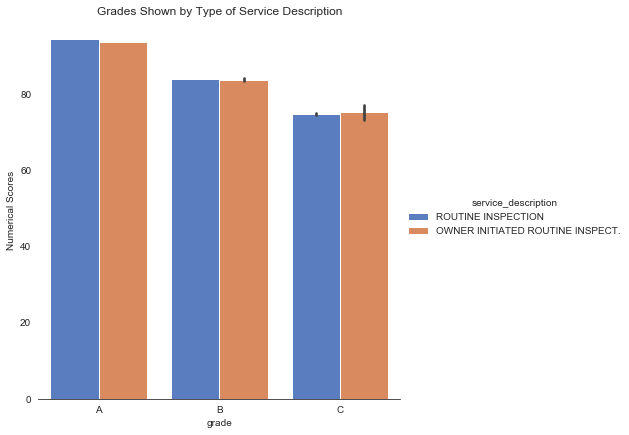

In [42]:
# Draw a nested barplot
g = sns.catplot(x="grade", y="score", hue="service_description", data=target_df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Numerical Scores")
plt.title('Grades Shown by Type of Service Description')

Text(0.5,1,'Scores by Location')

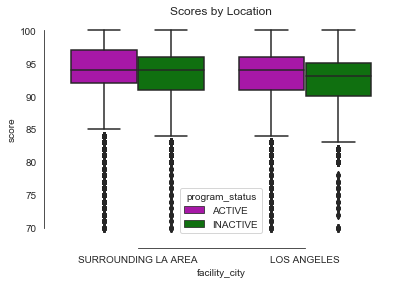

In [43]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="facility_city", y="score",
            hue="program_status", palette=["m", "g"],
            data=target_df)
sns.despine(offset=10, trim=True)
plt.title('Scores by Location')

In [44]:
# converting 'activity date' column to datetime
target_df['activity_date'] = target_df['activity_date'].astype('datetime64[ns]')

In [45]:
target_df.head(5)

,activity_date,facility_address,facility_city,facility_name,facility_zip,grade,owner_name,pe_description,program_element_pe,program_status,record_id,score,serial_number,service_description
0,2017-05-09,17660 CHATSWORTH ST,SURROUNDING LA AREA,HOVIK'S FAMOUS MEAT & DELI,91344,A,JOHN'S FAMOUS MEAT & DELI INC.,FOOD MKT RETAIL,1612,ACTIVE,PR0168541,98,DAHDRUQZO,ROUTINE INSPECTION
1,2017-04-10,3615 PACIFIC COAST HWY,SURROUNDING LA AREA,SHAKEY'S PIZZA,90505,A,"SCO, LLC",RESTAURANT,1638,ACTIVE,PR0190290,94,DAL3SBUE0,ROUTINE INSPECTION
2,2017-04-04,17515 CHATSWORTH ST,SURROUNDING LA AREA,BAITH AL HALAL,91344,A,SABIR MOHAMMAD SHAHID,FOOD MKT RETAIL,1612,INACTIVE,PR0036723,95,DAL2PIKJU,ROUTINE INSPECTION
3,2017-08-15,44455 VALLEY CENTRAL WAY,SURROUNDING LA AREA,FOOD 4 LESS #306,93536,A,"FOOD 4 LESS, INC.",RESTAURANT,1632,ACTIVE,PR0039905,98,DA0ZMAJXZ,ROUTINE INSPECTION
4,2016-09-26,11700 SOUTH ST,SURROUNDING LA AREA,PHO LITTLE SAIGON,90701,A,PHO SOUTH ST INC,RESTAURANT,1638,ACTIVE,PR0173311,96,DA41DBXA2,ROUTINE INSPECTION


Text(0.5,1,'Scores by Type of Food Establishment')

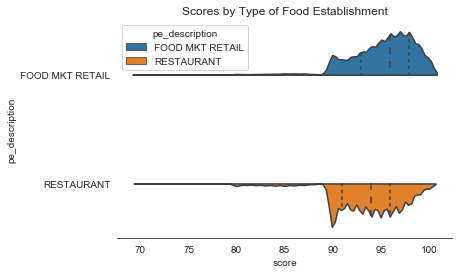

In [46]:
sns.violinplot(x="score", y="pe_description", hue="pe_description",
               split=True, inner="quart", scale='count',
               data=target_df)
sns.despine(left=True)
plt.title('Scores by Type of Food Establishment')

[]

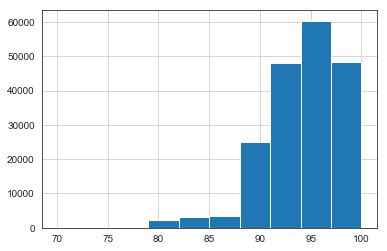

In [47]:
#histogram of scores
target_df['score'].hist().plot()

In [48]:
#making a csv file of the target_df dataframe
target_df.to_csv("output.csv", index=True, header=True)

Text(0.5,1,'Distribution of Grades across the Dataframe')

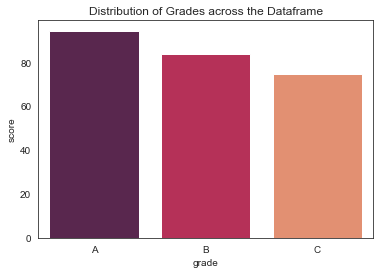

In [49]:
#Making a barplot
sns.barplot(x='grade', y='score', data=target_df, palette="rocket")
plt.title('Distribution of Grades across the Dataframe')

Text(0.5,1,'Top Violations')

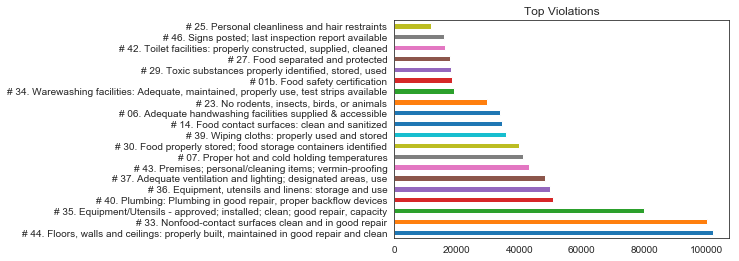

In [50]:
# Most common health code violations with violation_description
topviolate = violate_df['violation_description'].value_counts()

topviolate[:20].plot(kind='barh', rot=0)
plt.title('Top Violations')

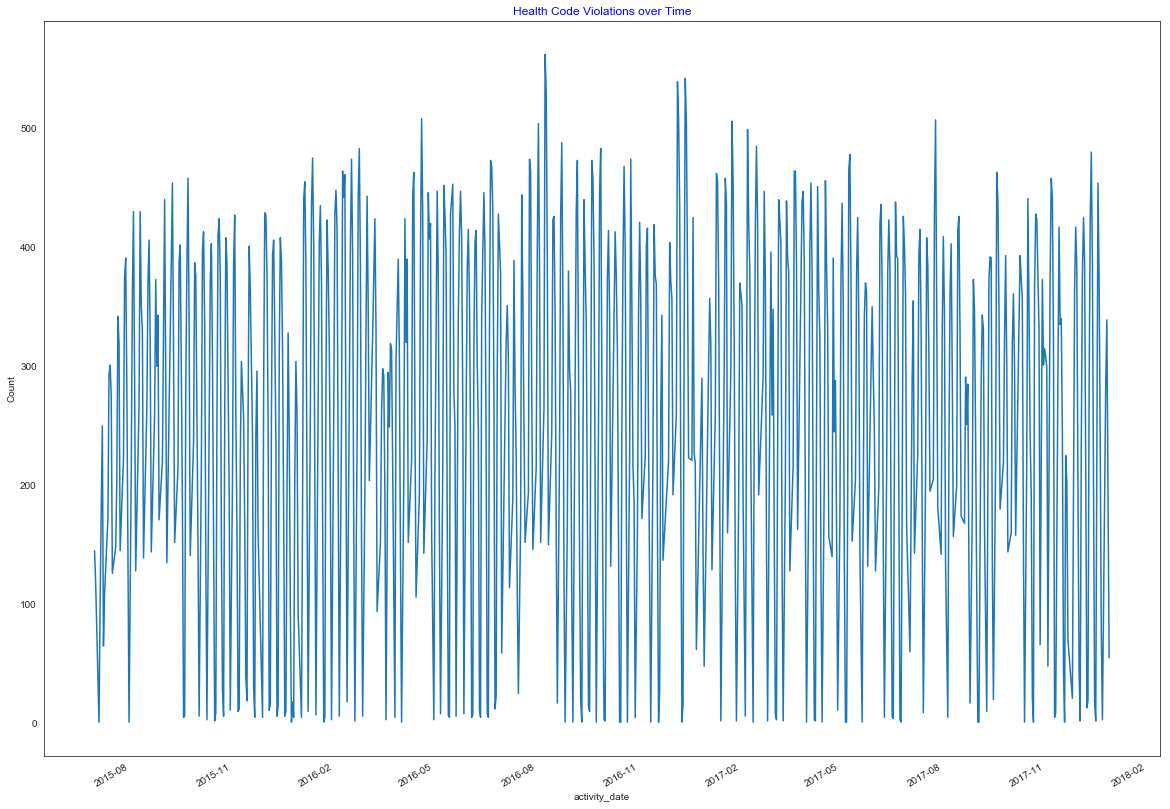

In [51]:
#Plotting Health Code violations over time
plt.figure(figsize=(20,15))
target_df.groupby('activity_date').count()['serial_number'].plot()
plt.ylabel("Count")
plt.title('Health Code Violations over Time', color='b')
plt.show()

Text(0.5,1,'Distribution of Facility City across the Dataframe')

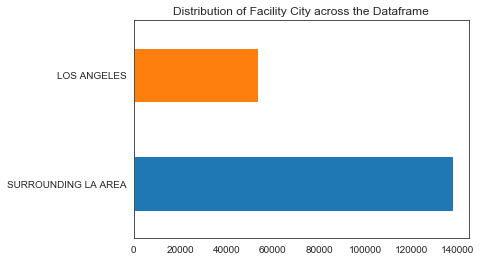

In [52]:
Bar = target_df['facility_city'].value_counts() 
Bar[:3].plot(kind = 'barh', rot = 0)
plt.title('Distribution of Facility City across the Dataframe')

In [53]:
#Create a list of features to dummy
todummy_list = ['facility_city', 'grade', 'pe_description', 'program_status', 'service_description']
#Function to dummy all categorical variables used for modeling
def dummy_df (target_df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(target_df[x], prefix=x, dummy_na=False)
        target_df = target_df.drop(x, 1)
        target_df = pd.concat([target_df, dummies], axis=1)
    return target_df

In [54]:
#creating a dataframe with features that have been dummied
curated_X = dummy_df(target_df, todummy_list)
print( curated_X.head(5))

  activity_date          facility_address               facility_name  \
0    2017-05-09       17660 CHATSWORTH ST  HOVIK'S FAMOUS MEAT & DELI   
1    2017-04-10    3615 PACIFIC COAST HWY              SHAKEY'S PIZZA   
2    2017-04-04       17515 CHATSWORTH ST              BAITH AL HALAL   
3    2017-08-15  44455 VALLEY CENTRAL WAY            FOOD 4 LESS #306   
4    2016-09-26            11700 SOUTH ST           PHO LITTLE SAIGON   

  facility_zip                      owner_name  program_element_pe  record_id  \
0        91344  JOHN'S FAMOUS MEAT & DELI INC.                1612  PR0168541   
1        90505                        SCO, LLC                1638  PR0190290   
2        91344           SABIR MOHAMMAD SHAHID                1612  PR0036723   
3        93536               FOOD 4 LESS, INC.                1632  PR0039905   
4        90701                PHO SOUTH ST INC                1638  PR0173311   

   score serial_number  facility_city_LOS ANGELES  \
0     98     DAHDRUQZ

In [55]:
#Many models assume that features are correlated with the outcome, but uncorrelated with each other. 
#Two highly-correlated variables can be averaged to create a feature, or one can be dropped.
#This is the attempt to find those features in the curated_X dataframe.
corrmat = curated_X.corr()

In [56]:
print (corrmat.head(5))

                                   program_element_pe     score  \
program_element_pe                           1.000000 -0.208018   
score                                       -0.208018  1.000000   
facility_city_LOS ANGELES                   -0.024307 -0.080467   
facility_city_SURROUNDING LA AREA            0.024307  0.080467   
grade_A                                     -0.058193  0.651644   

                                   facility_city_LOS ANGELES  \
program_element_pe                                 -0.024307   
score                                              -0.080467   
facility_city_LOS ANGELES                           1.000000   
facility_city_SURROUNDING LA AREA                  -1.000000   
grade_A                                            -0.044489   

                                   facility_city_SURROUNDING LA AREA  \
program_element_pe                                          0.024307   
score                                                       0.080467

In [57]:
#correlation using the 'spearman' method
example_spear = curated_X.corr(method='spearman')
print (example_spear.head(5))

                                   program_element_pe     score  \
program_element_pe                           1.000000 -0.243754   
score                                       -0.243754  1.000000   
facility_city_LOS ANGELES                   -0.037070 -0.081117   
facility_city_SURROUNDING LA AREA            0.037070  0.081117   
grade_A                                     -0.063139  0.388358   

                                   facility_city_LOS ANGELES  \
program_element_pe                                 -0.037070   
score                                              -0.081117   
facility_city_LOS ANGELES                           1.000000   
facility_city_SURROUNDING LA AREA                  -1.000000   
grade_A                                            -0.044489   

                                   facility_city_SURROUNDING LA AREA  \
program_element_pe                                          0.037070   
score                                                       0.081117

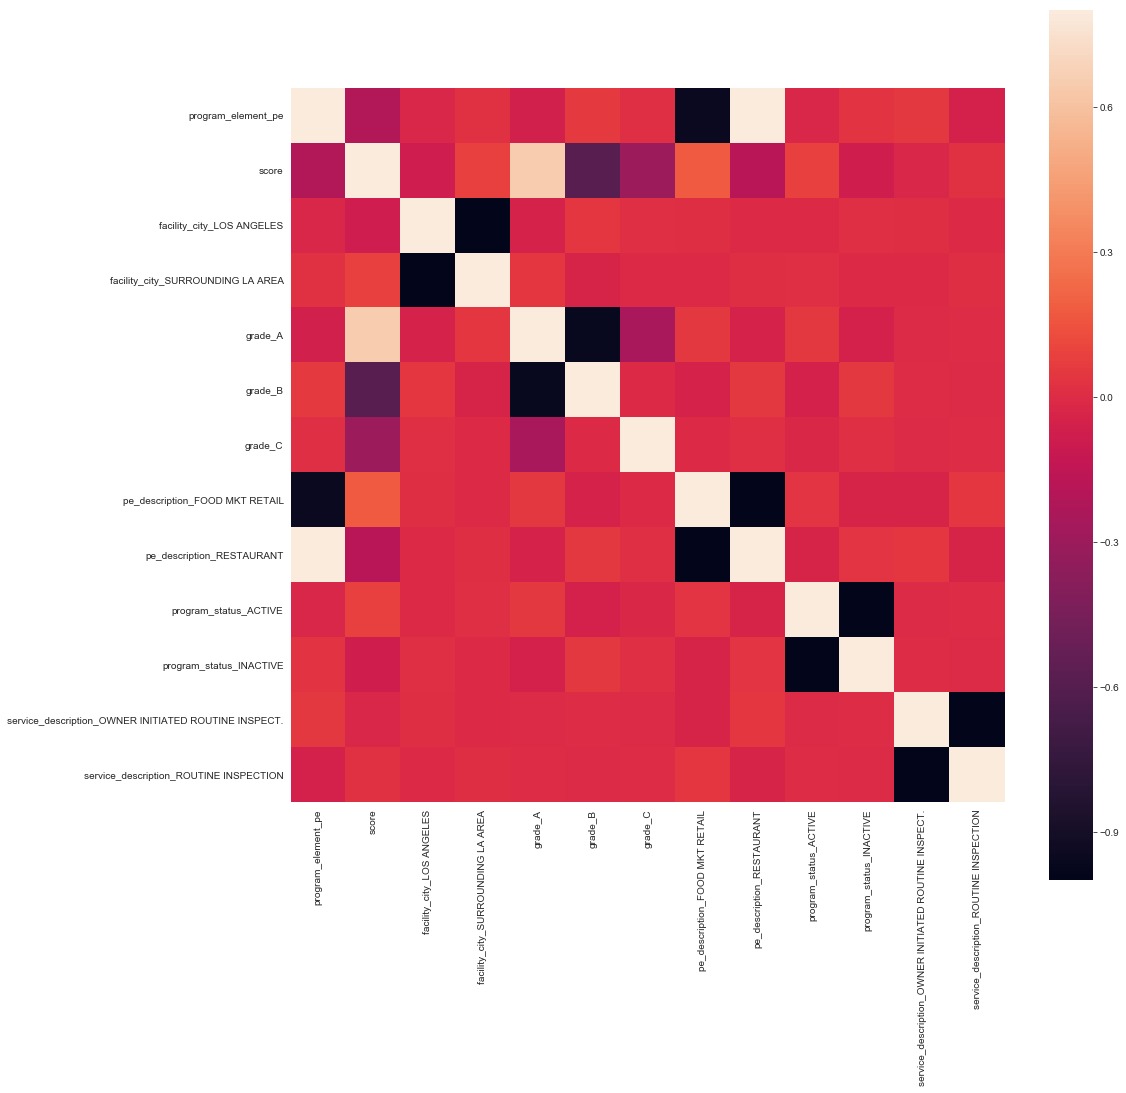

In [58]:
# drawing seaborn heatmap using pairwise coorelation dataframe of the curated_X dataframe
# looking for highly correlated variables
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(16, 16))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [59]:
# Looks like 'program_element_pe','pe_description_RESTAURANT', 'grade_A' and 'score' are highly correlated with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = curated_X[['program_element_pe','pe_description_RESTAURANT','grade_A', 'score']].mean(axis=0)
stds = curated_X[['program_element_pe','pe_description_RESTAURANT','grade_A', 'score']].std(axis=0)
curated_X['element_RESTAURANT_A_score'] = ((curated_X[['program_element_pe','pe_description_RESTAURANT','grade_A', 'score']] 
                                           - means) / stds).mean(axis=1)
print(curated_X['element_RESTAURANT_A_score'])

0        -0.653671
1         0.412323
2        -0.849687
3         0.513962
4         0.543000
5         0.383285
6        -1.085270
7         0.463143
8         0.356666
9        -0.968264
10       -1.390182
11        0.252608
12        0.071111
13       -0.757729
14        0.187269
15        0.071111
16       -1.033603
17        0.477662
18        0.150969
19        0.422004
20        0.124349
21       -0.035366
22        0.230826
23       -1.455520
24        0.346984
25        0.189688
26        0.397804
27        0.356666
28       -1.099789
29        0.230826
            ...   
191341    0.516381
191342    0.056592
191343   -0.008747
191344   -1.416801
191345    0.216307
191346    0.673677
191347    0.150969
191348    0.291327
191349   -0.810968
191350   -0.600433
191351   -0.706910
191352    0.673677
191353    0.543000
191354    0.320365
191355   -0.769829
191356    0.267127
191357    0.412323
191358    0.356666
191359    0.225988
191360    0.528481
191361    0.513962
191362    0.

In [60]:
# Features coorelation #2
# Looks like 'program_element_pe' and 'pe_description_RESTAURANT' are highly correlated with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = curated_X[['program_element_pe','pe_description_RESTAURANT']].mean(axis=0)
stds = curated_X[['program_element_pe','pe_description_RESTAURANT']].std(axis=0)
curated_X['element_RESTAURANT'] = ((curated_X[['program_element_pe','pe_description_RESTAURANT']] 
                                           - means) / stds).mean(axis=1)
print(curated_X['element_RESTAURANT'])

0        -1.979431
1         0.675266
2        -1.979431
3         0.355835
4         0.675266
5         0.355835
6         0.834981
7         0.515551
8         0.302597
9        -2.085908
10        0.355835
11        0.355835
12        0.515551
13       -1.926193
14        0.355835
15        0.515551
16       -2.085908
17        0.675266
18        0.675266
19        0.302597
20        0.622028
21        0.302597
22        0.834981
23        0.355835
24        0.675266
25        0.622028
26        0.515551
27        0.302597
28        0.675266
29        0.834981
            ...   
191341    0.622028
191342    0.355835
191343    0.355835
191344    0.302597
191345    0.675266
191346    0.675266
191347    0.675266
191348    0.302597
191349   -2.032670
191350   -1.872954
191351   -2.085908
191352    0.675266
191353    0.675266
191354    0.622028
191355   -1.819716
191356    0.515551
191357    0.675266
191358    0.302597
191359    0.302597
191360    0.515551
191361    0.355835
191362    0.

In [61]:
# Check how well the composite correlates with each of the individual variables.
plotdf = curated_X.loc[:, ['program_element_pe','pe_description_RESTAURANT','grade_A', 'score']]
plotdf['element_RESTAURANT_A_score'] = curated_X['element_RESTAURANT_A_score'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                            program_element_pe  pe_description_RESTAURANT  \
program_element_pe                    1.000000                   0.950883   
pe_description_RESTAURANT             0.950883                   1.000000   
grade_A                              -0.058193                  -0.050307   
score                                -0.208018                  -0.181128   
element_RESTAURANT_A_score            0.676048                   0.690004   

                             grade_A     score  element_RESTAURANT_A_score  
program_element_pe         -0.058193 -0.208018                    0.676048  
pe_description_RESTAURANT  -0.050307 -0.181128                    0.690004  
grade_A                     1.000000  0.651644                    0.619254  
score                       0.651644  1.000000                    0.506633  
element_RESTAURANT_A_score  0.619254  0.506633                    1.000000  


In [62]:
# Features correlation #2
# Check how well the composite correlates with each of the individual variables.
plotdf2 = curated_X.loc[:, ['program_element_pe','pe_description_RESTAURANT']]
plotdf2['element_RESTAURANT'] = curated_X['element_RESTAURANT'] 
corrmat3 = plotdf2.corr()

print(corrmat3)

                           program_element_pe  pe_description_RESTAURANT  \
program_element_pe                   1.000000                   0.950883   
pe_description_RESTAURANT            0.950883                   1.000000   
element_RESTAURANT                   0.987644                   0.987644   

                           element_RESTAURANT  
program_element_pe                   0.987644  
pe_description_RESTAURANT            0.987644  
element_RESTAURANT                   1.000000  


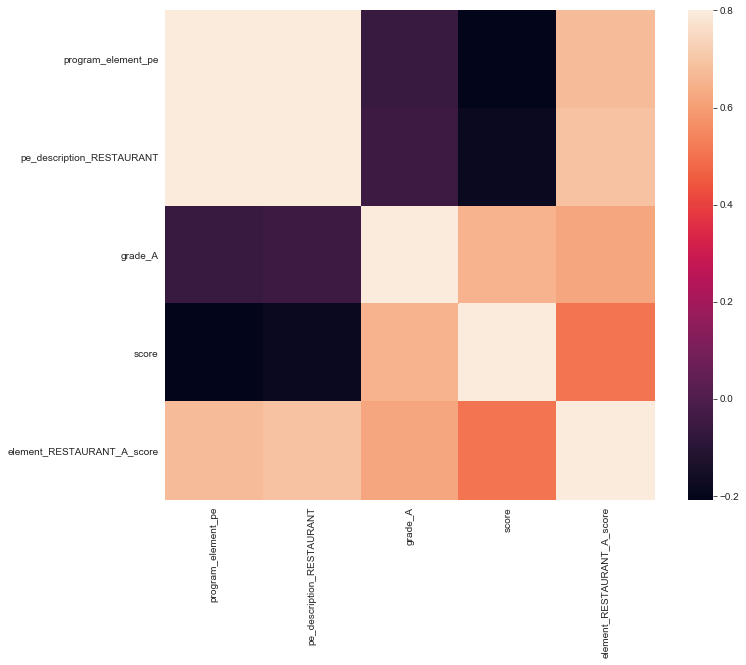

In [63]:
# drawing seaborn heatmap using pairwise coorelation dataframe using corrmat2
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()


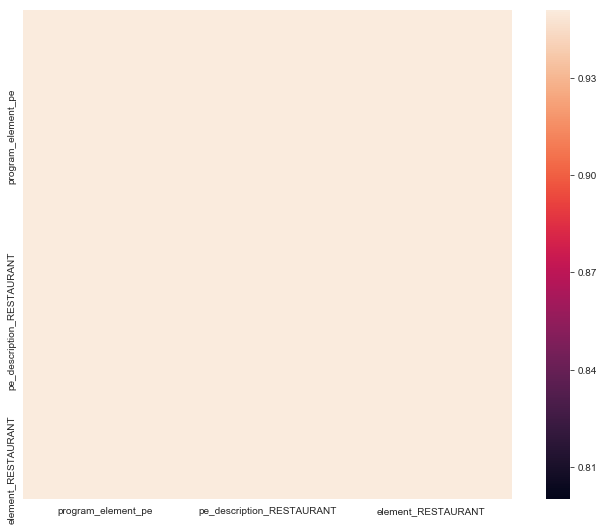

In [64]:
# Features correlation #2
# drawing seaborn heatmap using pairwise coorelation dataframe using corrmat3
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat3, vmax=.8, square=True)
plt.show()


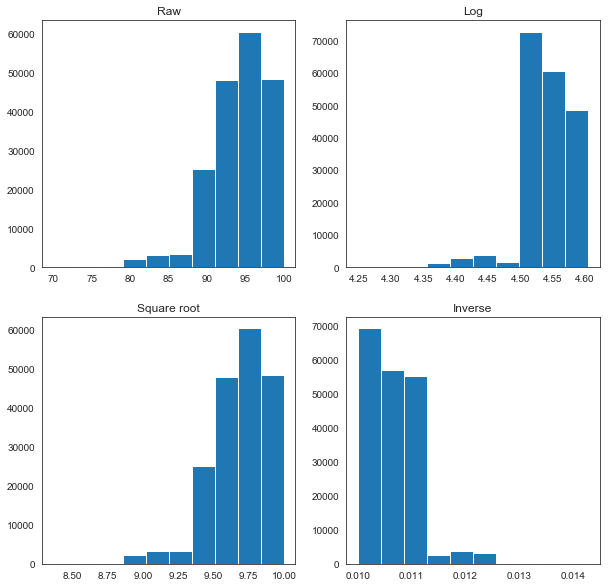

In [65]:
# Making a four-panel plot.
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(221)
plt.hist(target_df['score'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(target_df['score'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(target_df['score'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/target_df['score'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.
# And we'll add it to curated_X

curated_X['log_score'] = np.log(target_df['score'])

### Creating linear relationships
### Many models assume that the relationship between a feature and an outcome is linear. Sometimes, though, you want to include a variable that has a non-linear component to its relationship with the outcome. To capture non-linearity while keeping the model happy, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself.¶


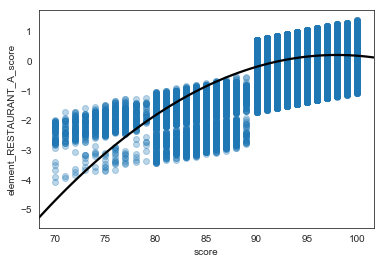

In [66]:
# Plotting data and a linear regression model fit using feature #1
sns.regplot(
    curated_X['score'],
    y=curated_X['element_RESTAURANT_A_score'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

curated_X['score_squared'] = curated_X['score'] * curated_X['score']

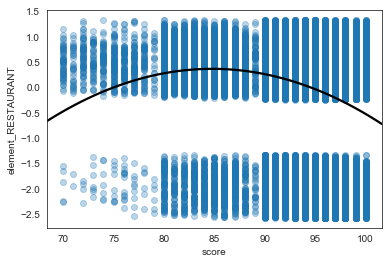

In [67]:
# Plotting data and a linear regression model fit using feature #2
sns.regplot(
    curated_X['score'],
    y=curated_X['element_RESTAURANT'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

#curated_X['score_squared'] = curated_X['score'] * curated_X['score']

In [68]:
inspect_df.head(5)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,SURROUNDING LA AREA,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,FOOD MKT RETAIL,1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,SURROUNDING LA AREA,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,SURROUNDING LA AREA,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,FOOD MKT RETAIL,1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,SURROUNDING LA AREA,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,SURROUNDING LA AREA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [69]:
violate_df.head(5)

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


### Leveling the playing field
### Some modeling methods assume that all features have values in the same range (all features have a min of 0 and max of 1, for example). Features that vary in range can result in incorrect estimates. We can normalize all the variables to the same scale (usually a mean of 0 and standard deviation of 1):¶



In [70]:
# importing preprocessing for eventually normalizing the variables
from sklearn import preprocessing

# Select only numeric variables to scale.
target_df_num = target_df.select_dtypes(include=[np.number]).dropna()

print (target_df_num.head(5))

   program_element_pe  score
0                1612     98
1                1638     94
2                1612     95
3                1632     98
4                1638     96


In [71]:
# Save the column names.
names=target_df_num.columns

print (names)

Index(['program_element_pe', 'score'], dtype='object')


In [72]:
# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
target_df_scaled = pd.DataFrame(preprocessing.scale(target_df_num), columns=names)

print (target_df_scaled.head(5))

   program_element_pe     score
0           -1.904679  1.108596
1            0.863726  0.063175
2           -1.904679  0.324531
3            0.224864  1.108596
4            0.863726  0.585886


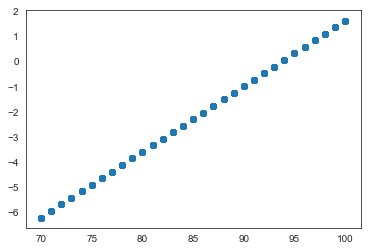

       program_element_pe         score
count        1.913390e+05  1.913390e+05
mean        -1.199057e-14  6.487855e-16
std          1.000003e+00  1.000003e+00
min         -2.117633e+00 -6.209347e+00
25%          1.183865e-01 -7.208899e-01
50%          2.248636e-01  6.317549e-02
75%          5.442950e-01  8.472408e-01
max          1.183158e+00  1.631306e+00


In [73]:
# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(target_df_num['score'], target_df_scaled['score'])
plt.show()

# Look at all those matching means and standard deviations!
print(target_df_scaled.describe())

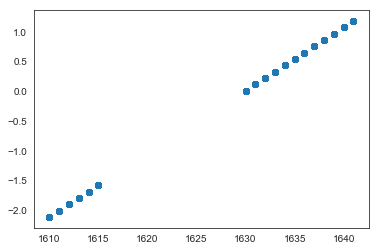

In [74]:
# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(target_df_num['program_element_pe'], target_df_scaled['program_element_pe'])
plt.show()


In [75]:
curated_X.head(5)

,activity_date,facility_address,facility_name,facility_zip,owner_name,program_element_pe,record_id,score,serial_number,facility_city_LOS ANGELES,...,pe_description_FOOD MKT RETAIL,pe_description_RESTAURANT,program_status_ACTIVE,program_status_INACTIVE,service_description_OWNER INITIATED ROUTINE INSPECT.,service_description_ROUTINE INSPECTION,element_RESTAURANT_A_score,element_RESTAURANT,log_score,score_squared
0,2017-05-09,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,91344,JOHN'S FAMOUS MEAT & DELI INC.,1612,PR0168541,98,DAHDRUQZO,0,...,1,0,1,0,0,1,-0.653671,-1.979431,4.584967,9604
1,2017-04-10,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,90505,"SCO, LLC",1638,PR0190290,94,DAL3SBUE0,0,...,0,1,1,0,0,1,0.412323,0.675266,4.543295,8836
2,2017-04-04,17515 CHATSWORTH ST,BAITH AL HALAL,91344,SABIR MOHAMMAD SHAHID,1612,PR0036723,95,DAL2PIKJU,0,...,1,0,0,1,0,1,-0.849687,-1.979431,4.553877,9025
3,2017-08-15,44455 VALLEY CENTRAL WAY,FOOD 4 LESS #306,93536,"FOOD 4 LESS, INC.",1632,PR0039905,98,DA0ZMAJXZ,0,...,0,1,1,0,0,1,0.513962,0.355835,4.584967,9604
4,2016-09-26,11700 SOUTH ST,PHO LITTLE SAIGON,90701,PHO SOUTH ST INC,1638,PR0173311,96,DA41DBXA2,0,...,0,1,1,0,0,1,0.543000,0.675266,4.564348,9216


### All about interactions
### If you suspect that the relationship between the outcome and a feature depends on the value of a second feature, you may want to create a feature that represents the interaction.
### Perhaps creating a new feature called worst_LA is a result of getting the location and multiplying it by the grade c for the worst restaurants in the LA area-proper. ¶

In [76]:
print (curated_X.columns)

Index(['activity_date', 'facility_address', 'facility_name', 'facility_zip',
       'owner_name', 'program_element_pe', 'record_id', 'score',
       'serial_number', 'facility_city_LOS ANGELES',
       'facility_city_SURROUNDING LA AREA', 'grade_A', 'grade_B', 'grade_C',
       'pe_description_FOOD MKT RETAIL', 'pe_description_RESTAURANT',
       'program_status_ACTIVE', 'program_status_INACTIVE',
       'service_description_OWNER INITIATED ROUTINE INSPECT.',
       'service_description_ROUTINE INSPECTION', 'element_RESTAURANT_A_score',
       'element_RESTAURANT', 'log_score', 'score_squared'],
      dtype='object')


In [77]:
# Create the interaction.
curated_X['worst_LA'] = curated_X['facility_city_LOS ANGELES'] * curated_X['grade_C']

print (curated_X['worst_LA'].head(5))

0    0
1    0
2    0
3    0
4    0
Name: worst_LA, dtype: uint8


In [78]:
curated_X.head(3)

,activity_date,facility_address,facility_name,facility_zip,owner_name,program_element_pe,record_id,score,serial_number,facility_city_LOS ANGELES,...,pe_description_RESTAURANT,program_status_ACTIVE,program_status_INACTIVE,service_description_OWNER INITIATED ROUTINE INSPECT.,service_description_ROUTINE INSPECTION,element_RESTAURANT_A_score,element_RESTAURANT,log_score,score_squared,worst_LA
0,2017-05-09,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,91344,JOHN'S FAMOUS MEAT & DELI INC.,1612,PR0168541,98,DAHDRUQZO,0,...,0,1,0,0,1,-0.653671,-1.979431,4.584967,9604,0
1,2017-04-10,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,90505,"SCO, LLC",1638,PR0190290,94,DAL3SBUE0,0,...,1,1,0,0,1,0.412323,0.675266,4.543295,8836,0
2,2017-04-04,17515 CHATSWORTH ST,BAITH AL HALAL,91344,SABIR MOHAMMAD SHAHID,1612,PR0036723,95,DAL2PIKJU,0,...,0,0,1,0,1,-0.849687,-1.979431,4.553877,9025,0


In [79]:
curated_X.columns

Index(['activity_date', 'facility_address', 'facility_name', 'facility_zip',
       'owner_name', 'program_element_pe', 'record_id', 'score',
       'serial_number', 'facility_city_LOS ANGELES',
       'facility_city_SURROUNDING LA AREA', 'grade_A', 'grade_B', 'grade_C',
       'pe_description_FOOD MKT RETAIL', 'pe_description_RESTAURANT',
       'program_status_ACTIVE', 'program_status_INACTIVE',
       'service_description_OWNER INITIATED ROUTINE INSPECT.',
       'service_description_ROUTINE INSPECTION', 'element_RESTAURANT_A_score',
       'element_RESTAURANT', 'log_score', 'score_squared', 'worst_LA'],
      dtype='object')

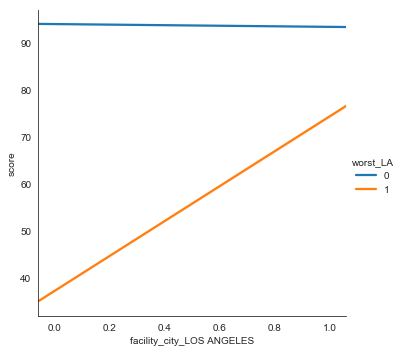

In [80]:
# Plot data and regression model fits across a FacetGrid.
# A plot of an interaction.
curated_X['grade'] = target_df['grade']
sns.lmplot(
    x='facility_city_LOS ANGELES',
    y='score',
    hue='worst_LA',
    data=curated_X,
    scatter=False
)
plt.show()

### Just playing around with the database.  Looking at adding more features.  And making some plots for educational purposes.

In [81]:
curated_X['score'].value_counts()

90     24563
96     20771
95     20321
97     19369
94     19264
93     17480
92     15811
98     15610
91     14667
99      8925
100     4497
80      1349
85      1313
84      1199
86      1162
83      1113
87       934
82       930
81       805
88       468
89       106
75       106
77        96
76        94
74        69
72        66
78        66
70        61
73        57
71        36
79        31
Name: score, dtype: int64

In [82]:
# Create a text variable so that output is easier to interpret.
curated_X['top_eats'] = None
curated_X.loc[curated_X['score'] >=98, 'top_eats'] = 'Top Eatery'
curated_X.loc[curated_X['score'] <= 97, 'top_eats'] = 'Not a Top Eatery'


In [83]:
curated_X.head(5)

,activity_date,facility_address,facility_name,facility_zip,owner_name,program_element_pe,record_id,score,serial_number,facility_city_LOS ANGELES,...,program_status_INACTIVE,service_description_OWNER INITIATED ROUTINE INSPECT.,service_description_ROUTINE INSPECTION,element_RESTAURANT_A_score,element_RESTAURANT,log_score,score_squared,worst_LA,grade,top_eats
0,2017-05-09,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,91344,JOHN'S FAMOUS MEAT & DELI INC.,1612,PR0168541,98,DAHDRUQZO,0,...,0,0,1,-0.653671,-1.979431,4.584967,9604,0,A,Top Eatery
1,2017-04-10,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,90505,"SCO, LLC",1638,PR0190290,94,DAL3SBUE0,0,...,0,0,1,0.412323,0.675266,4.543295,8836,0,A,Not a Top Eatery
2,2017-04-04,17515 CHATSWORTH ST,BAITH AL HALAL,91344,SABIR MOHAMMAD SHAHID,1612,PR0036723,95,DAL2PIKJU,0,...,1,0,1,-0.849687,-1.979431,4.553877,9025,0,A,Not a Top Eatery
3,2017-08-15,44455 VALLEY CENTRAL WAY,FOOD 4 LESS #306,93536,"FOOD 4 LESS, INC.",1632,PR0039905,98,DA0ZMAJXZ,0,...,0,0,1,0.513962,0.355835,4.584967,9604,0,A,Top Eatery
4,2016-09-26,11700 SOUTH ST,PHO LITTLE SAIGON,90701,PHO SOUTH ST INC,1638,PR0173311,96,DA41DBXA2,0,...,0,0,1,0.543000,0.675266,4.564348,9216,0,A,Not a Top Eatery


In [84]:
# Transforming the text variable created into a binary scoring system.
curated_X['top_eats_binary'] = None
curated_X.loc[curated_X['top_eats'] == 'Top Eatery', 'top_eats_binary'] = 1
curated_X.loc[curated_X['top_eats'] == 'Not a Top Eatery', 'top_eats_binary'] = 0


In [85]:
curated_X.head(5)

,activity_date,facility_address,facility_name,facility_zip,owner_name,program_element_pe,record_id,score,serial_number,facility_city_LOS ANGELES,...,service_description_OWNER INITIATED ROUTINE INSPECT.,service_description_ROUTINE INSPECTION,element_RESTAURANT_A_score,element_RESTAURANT,log_score,score_squared,worst_LA,grade,top_eats,top_eats_binary
0,2017-05-09,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,91344,JOHN'S FAMOUS MEAT & DELI INC.,1612,PR0168541,98,DAHDRUQZO,0,...,0,1,-0.653671,-1.979431,4.584967,9604,0,A,Top Eatery,1
1,2017-04-10,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,90505,"SCO, LLC",1638,PR0190290,94,DAL3SBUE0,0,...,0,1,0.412323,0.675266,4.543295,8836,0,A,Not a Top Eatery,0
2,2017-04-04,17515 CHATSWORTH ST,BAITH AL HALAL,91344,SABIR MOHAMMAD SHAHID,1612,PR0036723,95,DAL2PIKJU,0,...,0,1,-0.849687,-1.979431,4.553877,9025,0,A,Not a Top Eatery,0
3,2017-08-15,44455 VALLEY CENTRAL WAY,FOOD 4 LESS #306,93536,"FOOD 4 LESS, INC.",1632,PR0039905,98,DA0ZMAJXZ,0,...,0,1,0.513962,0.355835,4.584967,9604,0,A,Top Eatery,1
4,2016-09-26,11700 SOUTH ST,PHO LITTLE SAIGON,90701,PHO SOUTH ST INC,1638,PR0173311,96,DA41DBXA2,0,...,0,1,0.543000,0.675266,4.564348,9216,0,A,Not a Top Eatery,0


Text(0.5,1,'Distribution of Top Eateries across the Dataframe')

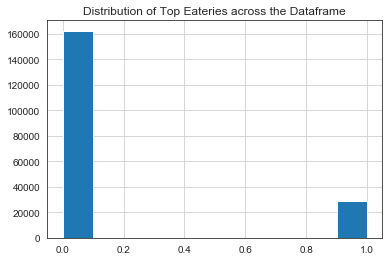

In [86]:
curated_X['top_eats_binary'].hist()
plt.title('Distribution of Top Eateries across the Dataframe')

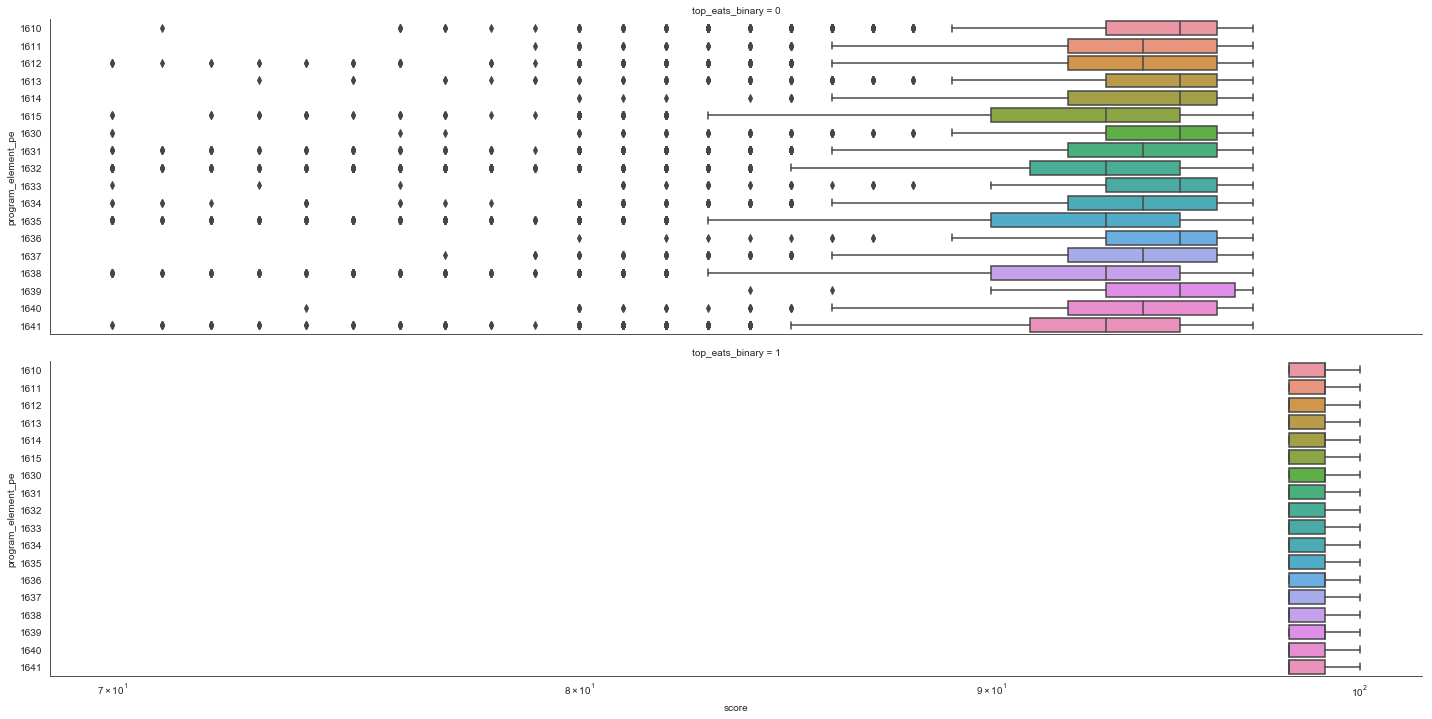

In [87]:
g = sns.catplot(x="score", y="program_element_pe", row="top_eats_binary",
                kind="box", orient="h", height=5, aspect=4,
                data=curated_X)
g.set(xscale="log");